In [73]:
# Dependencies
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
import seaborn as sns
sns.set(style='ticks',font='Arial',font_scale=1.0)
# rcParams['figure.dpi'] = 300
#rcParams['figure.figsize'] = 6,6
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [62]:
# Reading csv file and creating Data Frame
csv_file = "Alternative_Fuel_Locations.csv"
alternative_fuel_df = pd.read_csv(csv_file)

In [63]:
# Column names for cleaning out some 
alternative_fuel_df.columns

Index(['ID', 'Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'Location'],
      dtype='object')

In [64]:
# Accessing columns of interest
cleandf = alternative_fuel_df[['ID', 'Fuel Type Code', 'Station Name', 'Street Address',
                               'City', 'State', 'Status Code', 'Expected Date', 
                               'Groups With Access Code', 'Access Days Time', 'EV Other Info', 'EV Network',
                               'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
                               'Date Last Confirmed', 'Owner Type Code',
                               'Federal Agency ID', 'Federal Agency Name', 'Open Date']]

In [65]:
# Filter the data set for non-na Owner Type values, ELEC fuel type, and IL location
elec_df = cleandf[(cleandf["Fuel Type Code"] == "ELEC")&(cleandf["State"] == "IL")]
elec_df = elec_df.dropna(subset="Owner Type Code")

# Drop duplicates
elec_df = elec_df.drop_duplicates(subset="Street Address")

# Consolidate stations that are under the same entity
elec_df['Station Name'] = elec_df['Station Name'].replace({'Gerald Nissan': 'Nissan',
                                                           "Jim M'Lady Nissan": 'Nissan',
                                                           'Nissan of South Holland':'Nissan',
                                                           'Western Avenue Nissan':'Nissan',
                                                           'Kelly Nissan': 'Nissan',
                                                           'Glendale Nissan':'Nissan',
                                                           'Berman Nissan - Chicago':'Nissan',
                                                           'Arlington Nissan':'Nissan',
                                                           'The Autobarn Nissan': 'Nissan',
                                                           'Liberty Nissan': 'Nissan',
                                                           'Hawkinson Nissan':'Nissan',
                                                           'Martin Nissan':'Nissan',
                                                           'Thomas Nissan - Joilet': 'Nissan',
                                                           "Bill Kay's Nissan - Downers Grove":'Nissan',
                                                           'Woodfield Nissan':'Nissan',
                                                           'McGrath Nissan':'Nissan',
                                                           'Hove Nissan':'Nissan',
                                                           'Zeigler Nissan':'Nissan',
                                                           'Orland Park Nissan':"Nissan",
                                                           'Continental Nissan':'Nissan',
                                                           'Star Nissan':'Nissan',
                                                           'Al Piemonte Nissan':'Nissan',
                                                           'Gerald Nissan - North Aurora':'Nissan',
                                                           'Hove Buick-Nissan':'Nissan',
                                                           'Nissan of St Charles':'Nissan'})

In [66]:
# Create a series of Owner Type for Electric Fuel Stations in IL

In [67]:
elec_series = elec_df["Owner Type Code"].value_counts().sort_values()

elec_series = elec_series.rename({"P": "Private","LG" : "Local Government", "FG":"Federal Government", "T":"Utility Owned"})

In [68]:
# Plot Number of Owners of EV Stations in IL v. Owner Type

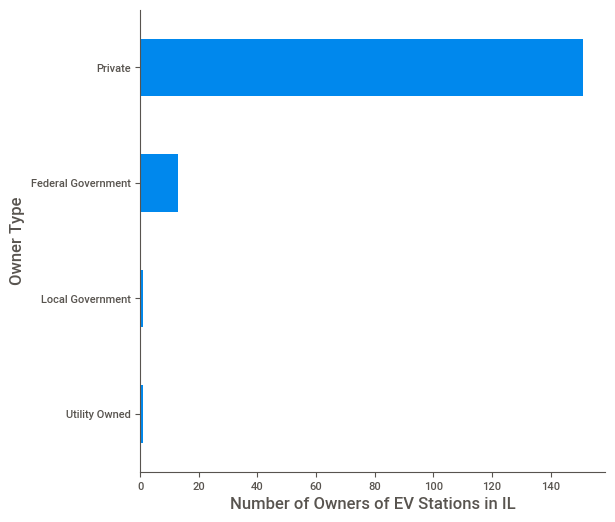

<Figure size 1200x800 with 0 Axes>

In [79]:
elec_chart = elec_series.plot(kind='barh', figsize=(6,6))

elec_chart.set_ylabel("Owner Type")
elec_chart.set_xlabel("Number of Owners of EV Stations in IL")

plt.savefig("./images/elec_ownerIL.png")
plt.show()
plt.tight_layout()

In [70]:
# Create a series of Station Name for Electric Fuel Stations in IL
stations_series = elec_df.groupby("Station Name")["Station Name"].count()
stations_series = stations_series.sort_values(ascending=False)

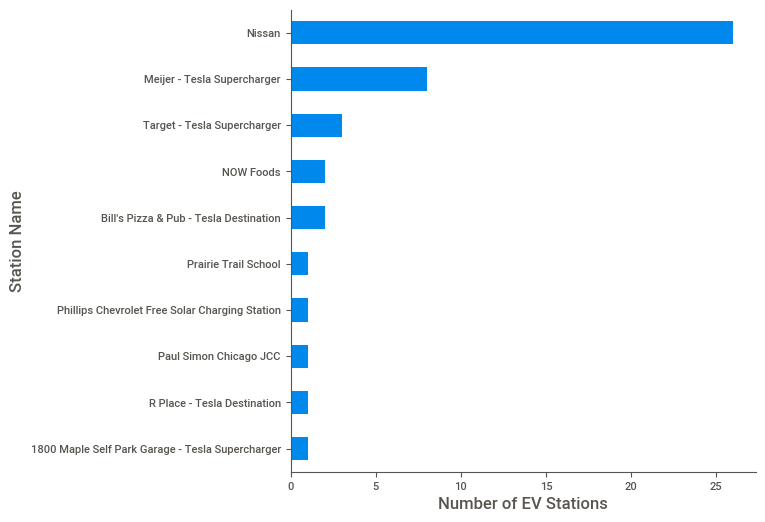

<Figure size 1200x800 with 0 Axes>

In [80]:
# Plot Number of Owners of EV Stations in IL v. Owner Type
top_10 = stations_series.head(10).sort_values()
top_10_chart = top_10.plot(kind='barh', figsize=(6,6))

top_10_chart.set_ylabel("Station Name")
top_10_chart.set_xlabel("Number of EV Stations")

plt.savefig("./images/top_10.png")
plt.show()
plt.tight_layout()